In [1]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.ndimage as ndi
import tensorflow as tf

#Read olivetti data
faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
x_train, x_test = faces['images'][0:200],faces['images'][200:]
x_train.shape, x_test.shape
#print(faces.DESCR)

((200, 64, 64), (200, 64, 64))

In [9]:
### edTest(test_olivetti_1) ###
SIZE = 64
cae = tf.keras.models.Sequential() 

### Encoder 
#1. Create a Convolutional layer with ?? filters, kernel size 3, 
#   Relu activation, padding same and input_shape
#cae.add( ____ )
cae.add( tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(64,64,1)) )

#2. Add Maxpool layer with 'same' padding
#cae.add( ____ )
cae.add( tf.keras.layers.MaxPool2D(pool_size=(2,2), padding="same") )

# # Decoder 
cae.add( tf.keras.layers.Conv2D(32, (1, 1), activation='relu'))
cae.add( tf.keras.layers.UpSampling2D((2, 2)) )
cae.add( tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')) 

cae.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.003))
 
cae.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 1)         33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [10]:
cae.fit(x=x_train.reshape(-1,SIZE,SIZE,1),
        y=x_train.reshape(-1,SIZE,SIZE,1),
        batch_size=32,
        validation_data=(x_test.reshape(-1,SIZE,SIZE,1),x_test.reshape(-1,SIZE,SIZE,1)),
        epochs=30)

Train on 200 samples, validate on 200 samples
Epoch 1/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0387 - val_loss: 0.0267
Epoch 2/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0262 - val_loss: 0.0244
Epoch 3/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0244 - val_loss: 0.0220
Epoch 4/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0216 - val_loss: 0.0186
Epoch 5/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0177 - val_loss: 0.0142
Epoch 6/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0129 - val_loss: 0.0091
Epoch 7/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0077 - val_loss: 0.0048
Epoch 8/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0041 - val_loss: 0.0027
Epoch 9/30
200/200 [==============================] - 0s 2ms/sample - loss: 0.0027 - val_loss: 0.0025
Epoch 10/30
200/200 [===============

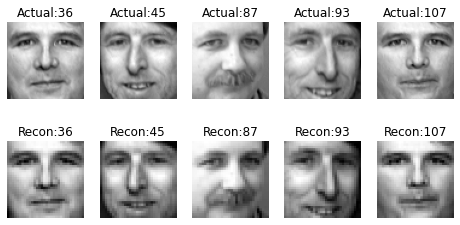

In [11]:
pred_imgs = cae.predict(x_test.reshape(-1,SIZE,SIZE,1))
fig, ax = plt.subplots(2,5, figsize=(8,4))

for i, index in enumerate([ 36, 45, 87, 93,107]):
    ax[0,i].imshow(x_test[index].reshape((SIZE,SIZE)), cmap='gray')
    ax[1,i].imshow(pred_imgs[index].reshape((SIZE,SIZE)), cmap='gray')
    ax[0,i].set_title(f'Actual:{index}') 
    ax[1,i].set_title(f'Recon:{index}') 
    ax[0,i].axis('off')
    ax[1,i].axis('off')